In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data

In [3]:
def windowed_dataset(series, batch_size, n_past, n_future, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    print('map: ')
    for window in ds:
        print(window)
        break
    return ds.batch(batch_size).prefetch(1)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmp/household_power_consumption.csv', sep=',',
                     infer_datetime_format=True, index_col='datetime', header=0)

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
N_FEATURES = len(df.columns)

print("N_FEATURES=", N_FEATURES)

N_FEATURES= 7


In [7]:
data = df.values
data = normalize_series(data, data.min(axis=0), data.max(axis=0))
print(len(data))

86400


In [8]:
SPLIT_TIME = int(len(data) * 0.5)
x_train = data[:SPLIT_TIME-14]
x_valid = data[SPLIT_TIME-14:]

In [9]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

BATCH_SIZE = 32
N_PAST = 24
N_FUTURE = 24
SHIFT = 1

In [10]:
train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)

map: 
(<tf.Tensor: shape=(24, 7), dtype=float64, numpy=
array([[0.43377912, 0.47826087, 0.04036551, 0.43564356, 0.        ,
        0.01282051, 0.85      ],
       [0.55716135, 0.49885584, 0.0355582 , 0.54950495, 0.        ,
        0.01282051, 0.8       ],
       [0.55867127, 0.56979405, 0.03420739, 0.54950495, 0.        ,
        0.02564103, 0.85      ],
       [0.56018119, 0.57437071, 0.03599523, 0.54950495, 0.        ,
        0.01282051, 0.85      ],
       [0.37446074, 0.60411899, 0.04370282, 0.37128713, 0.        ,
        0.01282051, 0.85      ],
       [0.35871441, 0.597254  , 0.04108065, 0.35148515, 0.        ,
        0.02564103, 0.85      ],
       [0.3783434 , 0.59496568, 0.04135876, 0.37128713, 0.        ,
        0.01282051, 0.85      ],
       [0.3781277 , 0.59496568, 0.04187525, 0.37128713, 0.        ,
        0.01282051, 0.85      ],
       [0.37467645, 0.58352403, 0.03698848, 0.37128713, 0.        ,
        0.01282051, 0.85      ],
       [0.37402934, 0.58352403, 0.0

In [11]:
for window in train_set:
    print(window)
    break

(<tf.Tensor: shape=(32, 24, 7), dtype=float64, numpy=
array([[[0.43377912, 0.47826087, 0.04036551, ..., 0.        ,
         0.01282051, 0.85      ],
        [0.55716135, 0.49885584, 0.0355582 , ..., 0.        ,
         0.01282051, 0.8       ],
        [0.55867127, 0.56979405, 0.03420739, ..., 0.        ,
         0.02564103, 0.85      ],
        ...,
        [0.81018119, 0.        , 0.0250298 , ..., 0.        ,
         0.        , 0.85      ],
        [0.73684211, 0.        , 0.02991657, ..., 0.        ,
         0.        , 0.8       ],
        [0.53710095, 0.        , 0.03778308, ..., 0.        ,
         0.        , 0.85      ]],

       [[0.55716135, 0.49885584, 0.0355582 , ..., 0.        ,
         0.01282051, 0.8       ],
        [0.55867127, 0.56979405, 0.03420739, ..., 0.        ,
         0.02564103, 0.85      ],
        [0.56018119, 0.57437071, 0.03599523, ..., 0.        ,
         0.01282051, 0.85      ],
        ...,
        [0.73684211, 0.        , 0.02991657, ..., 0.  

In [12]:
batch = 0
for window in train_set:
    print('train set - batch size:', batch)
    print(window)
    batch = batch +1

print("THE NUMBER OF BATCH SIZEs of TRAIN = ", batch)

Streaming output truncated to the last 5000 lines.
         0.        , 0.        ],
        [0.00194133, 0.        , 0.07369885, ..., 0.        ,
         0.        , 0.        ]],

       [[0.1145384 , 0.        , 0.05653556, ..., 0.        ,
         0.        , 0.9       ],
        [0.11410699, 0.        , 0.05478745, ..., 0.        ,
         0.        , 0.85      ],
        [0.11410699, 0.        , 0.05506555, ..., 0.        ,
         0.        , 0.9       ],
        ...,
        [0.00172563, 0.        , 0.07302344, ..., 0.        ,
         0.        , 0.        ],
        [0.00194133, 0.        , 0.07369885, ..., 0.        ,
         0.        , 0.        ],
        [0.01100086, 0.11899314, 0.07318236, ..., 0.        ,
         0.        , 0.        ]],

       ...,

       [[0.01013805, 0.13272311, 0.0757648 , ..., 0.        ,
         0.        , 0.        ],
        [0.01013805, 0.13501144, 0.07667859, ..., 0.        ,
         0.        , 0.        ],
        [0.00992235, 

In [13]:
valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)

map: 
(<tf.Tensor: shape=(24, 7), dtype=float64, numpy=
array([[0.13330457, 0.26315789, 0.0533969 , 0.12871287, 0.        ,
        0.        , 0.9       ],
       [0.13352028, 0.26544622, 0.05478745, 0.12871287, 0.        ,
        0.        , 0.85      ],
       [0.13373598, 0.26773455, 0.05617799, 0.12871287, 0.        ,
        0.        , 0.9       ],
       [0.13201035, 0.25400458, 0.05351609, 0.12871287, 0.        ,
        0.        , 0.85      ],
       [0.12553926, 0.14874142, 0.0526023 , 0.11881188, 0.        ,
        0.        , 0.85      ],
       [0.12510785, 0.14645309, 0.05041716, 0.11881188, 0.        ,
        0.        , 0.9       ],
       [0.12467645, 0.14416476, 0.04954311, 0.11881188, 0.        ,
        0.        , 0.85      ],
       [0.12467645, 0.14416476, 0.05001986, 0.11881188, 0.        ,
        0.        , 0.85      ],
       [0.12402934, 0.14187643, 0.04779499, 0.11881188, 0.        ,
        0.        , 0.85      ],
       [0.12510785, 0.14874142, 0.0

In [ ]:
batch = 0
for window in valid_set:
   batch = batch +1

print("THE NUMBER OF BATCH SIZE of VAL = ", batch)

In [14]:
train_iterations = np.ceil(len(list(train_set.as_numpy_iterator()))/BATCH_SIZE-1)
val_iteration = np.ceil(len(list(valid_set.as_numpy_iterator()))/BATCH_SIZE-1)

print("train_iterations=", train_iterations)
print("val_iterations=", val_iteration)

print (len(list(train_set.as_numpy_iterator()))-1)
print (len(list(valid_set.as_numpy_iterator()))-1)

train_iterations= 42.0
val_iterations= 42.0
1348
1348


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters = 32, kernel_size=5, strides=1, padding ='causal', activation='relu', batch_size = BATCH_SIZE, input_shape=(N_PAST, N_FEATURES)),
   # tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, batch_input_shape=(BATCH_SIZE, N_PAST, N_FEATURES), name="layer1"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, activation='relu',  return_sequences=True)),
    tf.keras.layers.Dense(N_FEATURES)
])

print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (32, 24, 32)              1152      
                                                                 
 bidirectional_3 (Bidirecti  (32, 24, 512)             591872    
 onal)                                                           
                                                                 
 dense_3 (Dense)             (32, 24, 7)               3591      
                                                                 
Total params: 596615 (2.28 MB)
Trainable params: 596615 (2.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
for layer in model.layers:
    print(layer.name,layer.input_shape)
    print(layer.output_shape)

conv1d (32, 24, 7)
(32, 24, 32)
bidirectional_3 (32, 24, 32)
(32, 24, 512)
dense_3 (32, 24, 512)
(32, 24, 7)


In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5)

model.compile(
        optimizer=optimizer,
        loss= tf.keras.losses.Huber(),
         metrics =['mae']
    )

In [27]:
history=model.fit(
    train_set,
    epochs = 50,
    validation_data = valid_set,
    # shuffle=True,
    steps_per_epoch = train_iterations,
    validation_steps = val_iteration,
    batch_size =BATCH_SIZE,
    callbacks=[early_stop]
      )

Epoch 1/50
42/42 [==============================] - 14s 115ms/step - loss: 0.0185 - mae: 0.1157 - val_loss: 0.0119 - val_mae: 0.0934
Epoch 2/50
42/42 [==============================] - 6s 153ms/step - loss: 0.0123 - mae: 0.0879 - val_loss: 0.0107 - val_mae: 0.0824
Epoch 3/50
42/42 [==============================] - 5s 108ms/step - loss: 0.0124 - mae: 0.0860 - val_loss: 0.0113 - val_mae: 0.0894
Epoch 4/50
42/42 [==============================] - 6s 144ms/step - loss: 0.0101 - mae: 0.0788 - val_loss: 0.0096 - val_mae: 0.0708
Epoch 5/50
42/42 [==============================] - 6s 137ms/step - loss: 0.0093 - mae: 0.0800 - val_loss: 0.0109 - val_mae: 0.0814
Epoch 6/50
42/42 [==============================] - 4s 107ms/step - loss: 0.0119 - mae: 0.0830 - val_loss: 0.0096 - val_mae: 0.0735
Epoch 7/50
42/42 [==============================] - 7s 167ms/step - loss: 0.0109 - mae: 0.0827 - val_loss: 0.0111 - val_mae: 0.0867
Epoch 8/50
42/42 [==============================] - 4s 101ms/step - loss: 0

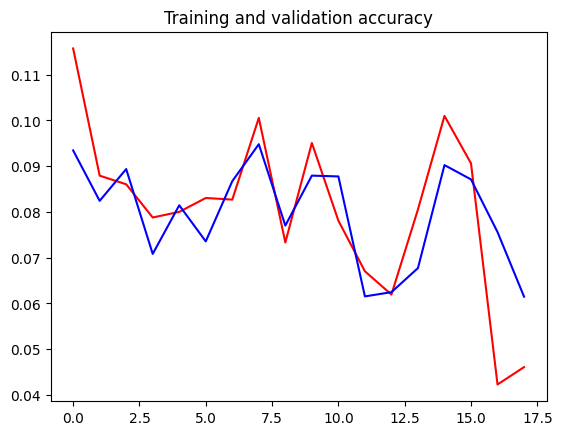

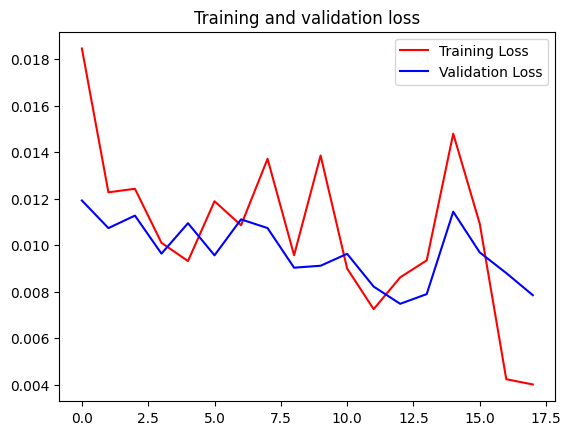

In [28]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc, 'r', label='Training accuracy')
plt.plot(epochs,val_acc, 'b', label ='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
def model_forecast(model, series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    dataset = dataset.batch(batch_size).prefetch(1)
    # Get predictions on the entire dataset
    dataset = dataset.take(len(list(dataset.as_numpy_iterator()))-1)
    forecast = model.predict(dataset)

    return forecast

In [30]:
pred =model_forecast(model, x_valid, N_PAST, BATCH_SIZE)

print(pred[-1][-1])
print()
print(pred[-1])
print()
print(pred)


1349/1349 [==============================] - 17s 12ms/step
[0.05145954 0.09009123 0.05548579 0.04915873 0.00452726 0.01632909
 0.08566224]

[[0.0606651  0.10567097 0.05696587 0.05947583 0.00475951 0.01079693
  0.01267106]
 [0.06237961 0.10250705 0.05969075 0.06115003 0.00495768 0.01120288
  0.02376228]
 [0.05875384 0.10053092 0.0593234  0.05593198 0.00451955 0.00990577
  0.02509672]
 [0.0568005  0.1027039  0.05897009 0.05482507 0.00456356 0.00919532
  0.03031204]
 [0.04799249 0.1068778  0.05953144 0.04778535 0.00549342 0.00866022
  0.02620516]
 [0.04229123 0.11165622 0.05980152 0.04319691 0.00561194 0.00884236
  0.02354752]
 [0.03774855 0.11337456 0.05985913 0.03933848 0.00494879 0.00862036
  0.02122579]
 [0.03374591 0.11345232 0.06013573 0.03497425 0.00370893 0.0081679
  0.02062652]
 [0.03176929 0.11282654 0.06028638 0.03262528 0.00315831 0.00765199
  0.0199042 ]
 [0.03099464 0.11296567 0.06072832 0.03151289 0.00282333 0.00702139
  0.01906748]
 [0.02991701 0.11357321 0.06151012 0.0299